### In addition to the model files, we also post charging profiles for each of the driver groups.

This notebook shows how those profiles were generated. This code is borrowed from the original SPEECh model repository: https://github.com/SiobhanPowell/speech/blob/main/ProcessingForPaper/7_produce_dataset.ipynb. 

Developed by Siobhan Powell, 2021. 

In [2]:
from speech_classes import DataSetConfigurations
from speech_classes import SPEECh
from speech_classes import SPEEChGeneralConfiguration
from speech_classes import Plotting
from speech_classes import LoadProfile

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
os.mkdir('Data_To_Post')

In [6]:
total_evs = 10000
weekday_option = 'weekday'

data = DataSetConfigurations('CP')
model = SPEECh(data)
model.pg_()
config = SPEEChGeneralConfiguration(model)
config.num_evs(total_evs)
config.groups()

results = {}
n = 10000
for i in range(data.ng):
    j = data.cluster_reorder_dendtoac[i]
    config.group_configs[j].numbers(total_drivers=n)
    config.group_configs[j].load_gmms()
    model = LoadProfile(config, config.group_configs[j], weekday=weekday_option)
    model.calculate_load()
    (pd.DataFrame(model.load_segments_dict)/n).to_csv('Data_To_Post/group'+str(int(i+1))+'_weekday.csv', index=None)
    results[i] = pd.DataFrame(model.load_segments_dict)/n

/opt/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:425: RuntimeWarning: covariance is not positive-semidefinite.
  for (mean, covariance, sample) in zip(


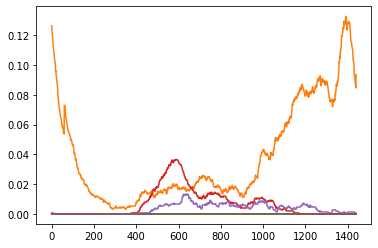

In [10]:
# test 
plt.plot(results[2])
plt.show()

In [11]:
total_evs = 10000
weekday_option = 'weekend'

data = DataSetConfigurations('CP')
model = SPEECh(data)
model.pg_()
config = SPEEChGeneralConfiguration(model)
config.num_evs(total_evs)
config.groups()

results = {}
n = 10000
for i in range(data.ng):
    j = data.cluster_reorder_dendtoac[i]
    config.group_configs[j].numbers(total_drivers=n)
    config.group_configs[j].load_gmms()
    model = LoadProfile(config, config.group_configs[j], weekday=weekday_option)
    model.calculate_load()
    (pd.DataFrame(model.load_segments_dict)/n).to_csv('Data_To_Post/group'+str(int(i+1))+'_weekend.csv', index=None)
    results[i] = pd.DataFrame(model.load_segments_dict)/n

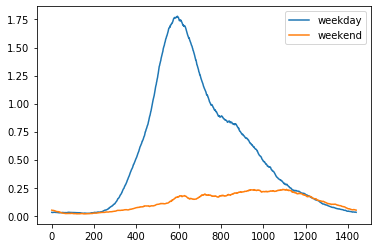

In [27]:
test = pd.read_csv('Data_To_Post/group131_weekday.csv')
test2 = pd.read_csv('Data_To_Post/group131_weekend.csv')
plt.plot(test.sum(axis=1), label='weekday')
plt.plot(test2.sum(axis=1), label='weekend')
plt.legend()
plt.show()

In [28]:
vals = np.zeros((136,))
for i in range(136):
    vals[i] = results[i].sum(axis=0).sum()*(1/60)

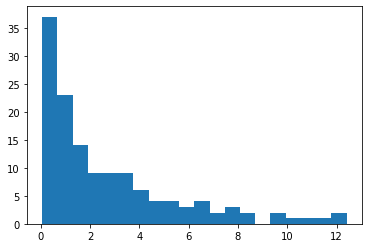

In [29]:
plt.hist(vals, 20)
plt.show()